In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from utilities import *
from nn_utilities import *
from fd_model_nn import FD_Network
from tensorflow.keras.callbacks import EarlyStopping
from utilities import _get_data_for_train_both_models

In [2]:
def fd_weidmann(m_s, v0, l, t):
    return v0 * (1 - np.exp((l - m_s) / (t * v0) ))
    
def train_nn_test_fd(task_train, task_test, fd_params):
    base_path = "../data/training_data/"
    X_train, y_train, fd_x_train = _get_data_for_train_both_models(base_path=base_path, task_data=task_train, train=True)
    X_test, y_test, fd_x_test = _get_data_for_train_both_models(base_path=base_path, task_data=task_test, train=False)

    # train speed nn
    hidden_dims = (3,)
    nn_losses = bootstrapped_cv(hidden_dims=hidden_dims, data=X_train, targets=y_train, test_data=X_test, test_targets=y_test,
                                kfolds=5, epochs=1000, batch_size=32, n_bootstraps=5, bootstrap_dim=5000)

    # once we have the selection stats, train an nn on the whole train to give predictions needed for FD model training
    nn = create_nn(hidden_dims, dropout=-1)
    nn.compile(optimizer='adam', loss='mse')
    # to stop the computation when model is at its cap
    callback = EarlyStopping(monitor='loss', patience=10)  # default on val_loss
    nn.fit(x=X_train, y=y_train, epochs=1000, callbacks=[callback], verbose=0)

    # test on whole test set
    fd_test_losses = []
    for single_in, single_out in zip(fd_x_test, y_test):
        pred = fd_weidmann(single_in, fd_params['v0'], fd_params['l'], fd_params['t'])
        fd_test_losses.append((pred - single_out)**2)
    fd_losses = {}
    fd_losses['test'] = (np.mean(np.array(fd_test_losses)), 0)
    return nn_losses, fd_losses

# TRYING DIFFERENT TRAINING/TESTING SITUATIONS


In [3]:
nn_total_losses = {}
fd_total_losses = {}
corridor = 'corridor_85'
bottleneck = 'bottleneck_070'
fd_par_c = {'t': 1.259, 'l': 0.274, 'v0': 0.957}
fd_par_b = {'t': 1.004, 'l': 0.399, 'v0': 2.176}
fd_par_bc = {'t': 1.124, 'l': 0.299, 'v0': 1.055}

In [4]:
# trying corridor85/corridor85
task = [corridor]
nn_losses, fd_losses = train_nn_test_fd(task_train=task, task_test=task, fd_params=fd_par_c)
nn_total_losses[f'{corridor}-{corridor}'] = nn_losses['test']
fd_total_losses[f'{corridor}-{corridor}'] = fd_losses['test']

Training: Sequential
Epoch 1/1000
125/125 [==============================] - 1s 4ms/step - loss: 1.4391 - val_loss: 1.0628
Epoch 2/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.8017 - val_loss: 0.6001
Epoch 3/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.4449 - val_loss: 0.3369
Epoch 4/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.2489 - val_loss: 0.1934
Epoch 5/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.1461 - val_loss: 0.1188
Epoch 6/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0954 - val_loss: 0.0829
Epoch 7/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0723 - val_loss: 0.0669
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0628 - val_loss: 0.0598
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0591 - val_loss: 0.0570
Epoch 10/1000
125/125 [==============================] - 0s 1

Epoch 80/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0364 - val_loss: 0.0348
Epoch 81/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0363 - val_loss: 0.0347
Epoch 82/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0363 - val_loss: 0.0350
Epoch 83/1000
125/125 [==============================] - 0s 976us/step - loss: 0.0362 - val_loss: 0.0347
Epoch 84/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0362 - val_loss: 0.0347
Epoch 85/1000
125/125 [==============================] - 0s 994us/step - loss: 0.0361 - val_loss: 0.0347
Epoch 86/1000
125/125 [==============================] - 0s 970us/step - loss: 0.0361 - val_loss: 0.0349
Epoch 87/1000
125/125 [==============================] - 0s 968us/step - loss: 0.0361 - val_loss: 0.0346
Epoch 88/1000
125/125 [==============================] - 0s 970us/step - loss: 0.0360 - val_loss: 0.0344
Epoch 89/1000
125/125 [==============================] - 0s 967

125/125 [==============================] - 0s 977us/step - loss: 0.0344 - val_loss: 0.0363
Epoch 5/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0343 - val_loss: 0.0367
Epoch 6/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0344 - val_loss: 0.0364
Epoch 7/1000
125/125 [==============================] - 0s 980us/step - loss: 0.0344 - val_loss: 0.0361
Epoch 8/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0343 - val_loss: 0.0366
Epoch 9/1000
125/125 [==============================] - 0s 970us/step - loss: 0.0342 - val_loss: 0.0361
Epoch 10/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0343 - val_loss: 0.0363
Epoch 11/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0342 - val_loss: 0.0363
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.0342
Epoch 2/1000
125/125 [==============================] - 

Epoch 49/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0369 - val_loss: 0.0394
Epoch 50/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0368 - val_loss: 0.0386
Epoch 51/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0365 - val_loss: 0.0386
Epoch 52/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0364 - val_loss: 0.0382
Epoch 53/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0362 - val_loss: 0.0378
Epoch 54/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0359 - val_loss: 0.0377
Epoch 55/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0358 - val_loss: 0.0372
Epoch 56/1000
125/125 [==============================] - 0s 933us/step - loss: 0.0356 - val_loss: 0.0371
Epoch 57/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0354 - val_loss: 0.0370
Epoch 58/1000
125/125 [==============================] 

125/125 [==============================] - 0s 931us/step - loss: 0.0312 - val_loss: 0.0316
Epoch 127/1000
125/125 [==============================] - 0s 936us/step - loss: 0.0312 - val_loss: 0.0318
Epoch 128/1000
125/125 [==============================] - 0s 927us/step - loss: 0.0312 - val_loss: 0.0316
Epoch 129/1000
125/125 [==============================] - 0s 919us/step - loss: 0.0312 - val_loss: 0.0317
Epoch 130/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0312 - val_loss: 0.0317
Epoch 131/1000
125/125 [==============================] - 0s 971us/step - loss: 0.0312 - val_loss: 0.0317
Epoch 132/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0311 - val_loss: 0.0318
Epoch 133/1000
125/125 [==============================] - 0s 976us/step - loss: 0.0312 - val_loss: 0.0316
Epoch 134/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0311 - val_loss: 0.0316
Epoch 135/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 954us/step - loss: 0.0306 - val_loss: 0.0312
Epoch 204/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0306 - val_loss: 0.0312
Epoch 205/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0307 - val_loss: 0.0313
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0307 - val_loss: 0.0307
Epoch 2/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0307 - val_loss: 0.0309
Epoch 3/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0306 - val_loss: 0.0310
Epoch 4/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0306 - val_loss: 0.0307
Epoch 5/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0306 - val_loss: 0.0311
Epoch 6/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0306 - val_loss: 0.0309
Epoch 7/1000
125/125 [==============================] 

Epoch 30/1000
125/125 [==============================] - 0s 982us/step - loss: 0.0383 - val_loss: 0.0368
Epoch 31/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0380 - val_loss: 0.0363
Epoch 32/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0379 - val_loss: 0.0360
Epoch 33/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0377 - val_loss: 0.0358
Epoch 34/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0376 - val_loss: 0.0357
Epoch 35/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0374 - val_loss: 0.0358
Epoch 36/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0372 - val_loss: 0.0357
Epoch 37/1000
125/125 [==============================] - 0s 992us/step - loss: 0.0371 - val_loss: 0.0351
Epoch 38/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0369 - val_loss: 0.0351
Epoch 39/1000
125/125 [==============================] - 0s 1ms/step 

125/125 [==============================] - 0s 915us/step - loss: 0.0328 - val_loss: 0.0339
Epoch 19/1000
125/125 [==============================] - 0s 908us/step - loss: 0.0328 - val_loss: 0.0339
Epoch 20/1000
125/125 [==============================] - 0s 922us/step - loss: 0.0328 - val_loss: 0.0339
Epoch 21/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0328 - val_loss: 0.0341
Epoch 22/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0327 - val_loss: 0.0339
Epoch 23/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0327 - val_loss: 0.0339
Epoch 24/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0327 - val_loss: 0.0338
Epoch 25/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0326 - val_loss: 0.0341
Epoch 26/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0327 - val_loss: 0.0339
Epoch 27/1000
125/125 [==============================] - 0s 909us/ste

Epoch 8/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0314 - val_loss: 0.0349
Epoch 9/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0315 - val_loss: 0.0348
Epoch 10/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0315 - val_loss: 0.0352
Epoch 11/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0315 - val_loss: 0.0350
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 1s 2ms/step - loss: 0.0977 - val_loss: 0.0782
Epoch 2/1000
125/125 [==============================] - 0s 992us/step - loss: 0.0663 - val_loss: 0.0657
Epoch 3/1000
125/125 [==============================] - 0s 984us/step - loss: 0.0591 - val_loss: 0.0618
Epoch 4/1000
125/125 [==============================] - 0s 968us/step - loss: 0.0564 - val_loss: 0.0601
Epoch 5/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0549 - val_loss: 0.0590
Epoch 6/1000
125/125 [=======================

Epoch 75/1000
125/125 [==============================] - 0s 936us/step - loss: 0.0321 - val_loss: 0.0364
Epoch 76/1000
125/125 [==============================] - 0s 928us/step - loss: 0.0320 - val_loss: 0.0362
Epoch 77/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0320 - val_loss: 0.0364
Epoch 78/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0320 - val_loss: 0.0361
Epoch 79/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0321 - val_loss: 0.0363
Epoch 80/1000
125/125 [==============================] - 0s 971us/step - loss: 0.0320 - val_loss: 0.0362
Epoch 81/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0320 - val_loss: 0.0361
Epoch 82/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0320 - val_loss: 0.0361
Epoch 83/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0320 - val_loss: 0.0362
Epoch 84/1000
125/125 [==============================] 

125/125 [==============================] - 0s 964us/step - loss: 0.0331 - val_loss: 0.0294
Epoch 6/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0331 - val_loss: 0.0295
Epoch 7/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0331 - val_loss: 0.0293
Epoch 8/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0331 - val_loss: 0.0292
Epoch 9/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0331 - val_loss: 0.0295
Epoch 10/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0331 - val_loss: 0.0295
Epoch 11/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0331 - val_loss: 0.0292
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0323 - val_loss: 0.0321
Epoch 2/1000
125/125 [==============================] - 0s 927us/step - loss: 0.0323 - val_loss: 0.0322
Epoch 3/1000
125/125 [==============================] - 

125/125 [==============================] - 0s 949us/step - loss: 0.0338 - val_loss: 0.0345
Epoch 62/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0337 - val_loss: 0.0343
Epoch 63/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0337 - val_loss: 0.0338
Epoch 64/1000
125/125 [==============================] - 0s 987us/step - loss: 0.0337 - val_loss: 0.0345
Epoch 65/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0336 - val_loss: 0.0339
Epoch 66/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0335 - val_loss: 0.0341
Epoch 67/1000
125/125 [==============================] - 0s 910us/step - loss: 0.0336 - val_loss: 0.0336
Epoch 68/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0334 - val_loss: 0.0342
Epoch 69/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0335 - val_loss: 0.0337
Epoch 70/1000
125/125 [==============================] - 0s 947us/ste

In [5]:
# trying bottleneck180/bottleneck180
task = [bottleneck]
nn_losses, fd_losses = train_nn_test_fd(task_train=task, task_test=task, fd_params=fd_par_b)
nn_total_losses[f'{bottleneck}-{bottleneck}'] = nn_losses['test']
fd_total_losses[f'{bottleneck}-{bottleneck}'] = fd_losses['test']

Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.1694 - val_loss: 0.1136
Epoch 2/1000
125/125 [==============================] - 0s 954us/step - loss: 0.1061 - val_loss: 0.0949
Epoch 3/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0945 - val_loss: 0.0869
Epoch 4/1000
125/125 [==============================] - 0s 907us/step - loss: 0.0881 - val_loss: 0.0824
Epoch 5/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0836 - val_loss: 0.0789
Epoch 6/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0805 - val_loss: 0.0766
Epoch 7/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0780 - val_loss: 0.0749
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0759 - val_loss: 0.0733
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0741 - val_loss: 0.0721
Epoch 10/1000
125/125 [============================

125/125 [==============================] - 0s 946us/step - loss: 0.0427 - val_loss: 0.0449
Epoch 80/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0428 - val_loss: 0.0446
Epoch 81/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0427 - val_loss: 0.0448
Epoch 82/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0426 - val_loss: 0.0448
Epoch 83/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0426 - val_loss: 0.0446
Epoch 84/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0425 - val_loss: 0.0445
Epoch 85/1000
125/125 [==============================] - 0s 983us/step - loss: 0.0425 - val_loss: 0.0447
Epoch 86/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0425 - val_loss: 0.0448
Epoch 87/1000
125/125 [==============================] - 0s 979us/step - loss: 0.0424 - val_loss: 0.0444
Epoch 88/1000
125/125 [==============================] - 0s 953us/ste

125/125 [==============================] - 0s 959us/step - loss: 0.0853 - val_loss: 0.0867
Epoch 3/1000
125/125 [==============================] - 0s 886us/step - loss: 0.0732 - val_loss: 0.0759
Epoch 4/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0669 - val_loss: 0.0696
Epoch 5/1000
125/125 [==============================] - 0s 967us/step - loss: 0.0631 - val_loss: 0.0657
Epoch 6/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0606 - val_loss: 0.0629
Epoch 7/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0586 - val_loss: 0.0609
Epoch 8/1000
125/125 [==============================] - 0s 982us/step - loss: 0.0570 - val_loss: 0.0589
Epoch 9/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0556 - val_loss: 0.0577
Epoch 10/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0543 - val_loss: 0.0561
Epoch 11/1000
125/125 [==============================] - 0s 916us/step - los

125/125 [==============================] - 0s 950us/step - loss: 0.0393 - val_loss: 0.0412
Epoch 81/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0393 - val_loss: 0.0412
Epoch 82/1000
125/125 [==============================] - 0s 918us/step - loss: 0.0394 - val_loss: 0.0411
Epoch 83/1000
125/125 [==============================] - 0s 967us/step - loss: 0.0392 - val_loss: 0.0411
Epoch 84/1000
125/125 [==============================] - 0s 937us/step - loss: 0.0391 - val_loss: 0.0411
Epoch 85/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0391 - val_loss: 0.0410
Epoch 86/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0391 - val_loss: 0.0409
Epoch 87/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0391 - val_loss: 0.0405
Epoch 88/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0389 - val_loss: 0.0405
Epoch 89/1000
125/125 [==============================] - 0s 993us/ste

125/125 [==============================] - 0s 948us/step - loss: 0.0366 - val_loss: 0.0379
Epoch 158/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0367 - val_loss: 0.0375
Epoch 159/1000
125/125 [==============================] - 0s 983us/step - loss: 0.0366 - val_loss: 0.0375
Epoch 160/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0366 - val_loss: 0.0375
Epoch 161/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0366 - val_loss: 0.0377
Epoch 162/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0365 - val_loss: 0.0376
Epoch 163/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0365 - val_loss: 0.0377
Epoch 164/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0365 - val_loss: 0.0376
Epoch 165/1000
125/125 [==============================] - 0s 938us/step - loss: 0.0365 - val_loss: 0.0377
Epoch 166/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 951us/step - loss: 0.0362 - val_loss: 0.0331
Epoch 6/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0363 - val_loss: 0.0329
Epoch 7/1000
125/125 [==============================] - 0s 974us/step - loss: 0.0362 - val_loss: 0.0330
Epoch 8/1000
125/125 [==============================] - 0s 979us/step - loss: 0.0363 - val_loss: 0.0332
Epoch 9/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0362 - val_loss: 0.0332
Epoch 10/1000
125/125 [==============================] - 0s 931us/step - loss: 0.0362 - val_loss: 0.0330
Epoch 11/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0362 - val_loss: 0.0332
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 1s 2ms/step - loss: 0.0359 - val_loss: 0.0345
Epoch 2/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0358 - val_loss: 0.0343
Epoch 3/1000
125/125 [==============================] - 

Epoch 33/1000
125/125 [==============================] - 0s 921us/step - loss: 0.0490 - val_loss: 0.0466
Epoch 34/1000
125/125 [==============================] - 0s 936us/step - loss: 0.0487 - val_loss: 0.0464
Epoch 35/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0484 - val_loss: 0.0459
Epoch 36/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0480 - val_loss: 0.0456
Epoch 37/1000
125/125 [==============================] - 0s 911us/step - loss: 0.0477 - val_loss: 0.0452
Epoch 38/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0474 - val_loss: 0.0451
Epoch 39/1000
125/125 [==============================] - 0s 921us/step - loss: 0.0473 - val_loss: 0.0448
Epoch 40/1000
125/125 [==============================] - 0s 910us/step - loss: 0.0471 - val_loss: 0.0449
Epoch 41/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0469 - val_loss: 0.0445
Epoch 42/1000
125/125 [==============================] 

Epoch 111/1000
125/125 [==============================] - 0s 929us/step - loss: 0.0424 - val_loss: 0.0408
Epoch 112/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0424 - val_loss: 0.0408
Epoch 113/1000
125/125 [==============================] - 0s 927us/step - loss: 0.0424 - val_loss: 0.0409
Epoch 114/1000
125/125 [==============================] - 0s 923us/step - loss: 0.0424 - val_loss: 0.0408
Epoch 115/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0424 - val_loss: 0.0407
Epoch 116/1000
125/125 [==============================] - 0s 928us/step - loss: 0.0424 - val_loss: 0.0407
Epoch 117/1000
125/125 [==============================] - 0s 919us/step - loss: 0.0423 - val_loss: 0.0409
Epoch 118/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0423 - val_loss: 0.0407
Epoch 119/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0423 - val_loss: 0.0407
Epoch 120/1000
125/125 [======================

125/125 [==============================] - 0s 915us/step - loss: 0.0413 - val_loss: 0.0394
Epoch 189/1000
125/125 [==============================] - 0s 928us/step - loss: 0.0413 - val_loss: 0.0394
Epoch 190/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0413 - val_loss: 0.0396
Epoch 191/1000
125/125 [==============================] - 0s 937us/step - loss: 0.0412 - val_loss: 0.0394
Epoch 192/1000
125/125 [==============================] - 0s 933us/step - loss: 0.0412 - val_loss: 0.0395
Epoch 193/1000
125/125 [==============================] - 0s 923us/step - loss: 0.0412 - val_loss: 0.0395
Epoch 194/1000
125/125 [==============================] - 0s 931us/step - loss: 0.0412 - val_loss: 0.0394
Epoch 195/1000
125/125 [==============================] - 0s 889us/step - loss: 0.0413 - val_loss: 0.0395
Epoch 196/1000
125/125 [==============================] - 0s 909us/step - loss: 0.0412 - val_loss: 0.0394
Epoch 197/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 933us/step - loss: 0.0410 - val_loss: 0.0377
Epoch 4/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0410 - val_loss: 0.0375
Epoch 5/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0409 - val_loss: 0.0377
Epoch 6/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0409 - val_loss: 0.0377
Epoch 7/1000
125/125 [==============================] - 0s 932us/step - loss: 0.0409 - val_loss: 0.0377
Epoch 8/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0408 - val_loss: 0.0378
Epoch 9/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0408 - val_loss: 0.0374
Epoch 10/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0408 - val_loss: 0.0377
Epoch 11/1000
125/125 [==============================] - 0s 898us/step - loss: 0.0408 - val_loss: 0.0375
Epoch 12/1000
125/125 [==============================] - 0s 953us/step - lo

125/125 [==============================] - 0s 961us/step - loss: 0.0446 - val_loss: 0.0487
Epoch 56/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0446 - val_loss: 0.0482
Epoch 57/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0444 - val_loss: 0.0480
Epoch 58/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0443 - val_loss: 0.0480
Epoch 59/1000
125/125 [==============================] - 0s 1000us/step - loss: 0.0443 - val_loss: 0.0478
Epoch 60/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0443 - val_loss: 0.0480
Epoch 61/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0441 - val_loss: 0.0477
Epoch 62/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0440 - val_loss: 0.0475
Epoch 63/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0440 - val_loss: 0.0472
Epoch 64/1000
125/125 [==============================] - 0s 953us/st

125/125 [==============================] - 0s 1ms/step - loss: 0.0397 - val_loss: 0.0436
Epoch 133/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0396 - val_loss: 0.0434
Epoch 134/1000
125/125 [==============================] - 0s 938us/step - loss: 0.0398 - val_loss: 0.0428
Epoch 135/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0396 - val_loss: 0.0427
Epoch 136/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0396 - val_loss: 0.0431
Epoch 137/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0396 - val_loss: 0.0429
Epoch 138/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0396 - val_loss: 0.0430
Epoch 139/1000
125/125 [==============================] - 0s 924us/step - loss: 0.0397 - val_loss: 0.0431
Epoch 140/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0396 - val_loss: 0.0430
Epoch 141/1000
125/125 [==============================] - 0s 935u

125/125 [==============================] - 0s 944us/step - loss: 0.0388 - val_loss: 0.0399
Epoch 5/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0387 - val_loss: 0.0395
Epoch 6/1000
125/125 [==============================] - 0s 919us/step - loss: 0.0387 - val_loss: 0.0398
Epoch 7/1000
125/125 [==============================] - 0s 986us/step - loss: 0.0387 - val_loss: 0.0405
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0402
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0387 - val_loss: 0.0400
Epoch 10/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0388 - val_loss: 0.0400
Epoch 11/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0386 - val_loss: 0.0402
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.0374
Epoch 2/1000
125/125 [==============================] - 0s 944us

125/125 [==============================] - 0s 975us/step - loss: 0.0435 - val_loss: 0.0439
Epoch 61/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0435 - val_loss: 0.0438
Epoch 62/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0434 - val_loss: 0.0441
Epoch 63/1000
125/125 [==============================] - 0s 975us/step - loss: 0.0434 - val_loss: 0.0436
Epoch 64/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0433 - val_loss: 0.0441
Epoch 65/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0433 - val_loss: 0.0437
Epoch 66/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0432 - val_loss: 0.0441
Epoch 67/1000
125/125 [==============================] - 0s 967us/step - loss: 0.0432 - val_loss: 0.0439
Epoch 68/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0433 - val_loss: 0.0438
Epoch 69/1000
125/125 [==============================] - 0s 968us/ste

Epoch 138/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0409 - val_loss: 0.0414
Epoch 139/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0408 - val_loss: 0.0413
Epoch 140/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0408 - val_loss: 0.0413
Epoch 141/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0408 - val_loss: 0.0412
Epoch 142/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0406 - val_loss: 0.0416
Epoch 143/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0406 - val_loss: 0.0411
Epoch 144/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0405 - val_loss: 0.0411
Epoch 145/1000
125/125 [==============================] - 0s 979us/step - loss: 0.0405 - val_loss: 0.0413
Epoch 146/1000
125/125 [==============================] - 0s 938us/step - loss: 0.0405 - val_loss: 0.0412
Epoch 147/1000
125/125 [======================

125/125 [==============================] - 0s 925us/step - loss: 0.0374 - val_loss: 0.0383
Epoch 216/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0373 - val_loss: 0.0377
Epoch 217/1000
125/125 [==============================] - 0s 909us/step - loss: 0.0374 - val_loss: 0.0373
Epoch 218/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0373 - val_loss: 0.0376
Epoch 219/1000
125/125 [==============================] - 0s 930us/step - loss: 0.0372 - val_loss: 0.0374
Epoch 220/1000
125/125 [==============================] - 0s 938us/step - loss: 0.0372 - val_loss: 0.0374
Epoch 221/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0371 - val_loss: 0.0372
Epoch 222/1000
125/125 [==============================] - 0s 921us/step - loss: 0.0371 - val_loss: 0.0371
Epoch 223/1000
125/125 [==============================] - 0s 923us/step - loss: 0.0370 - val_loss: 0.0372
Epoch 224/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 942us/step - loss: 0.0354 - val_loss: 0.0349
Epoch 293/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0354 - val_loss: 0.0350
Epoch 294/1000
125/125 [==============================] - 0s 970us/step - loss: 0.0353 - val_loss: 0.0350
Epoch 295/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0353 - val_loss: 0.0351
Epoch 296/1000
125/125 [==============================] - 0s 926us/step - loss: 0.0354 - val_loss: 0.0349
Epoch 297/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0354 - val_loss: 0.0351
Epoch 298/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0353 - val_loss: 0.0353
Epoch 299/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0354 - val_loss: 0.0349
Epoch 300/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0353 - val_loss: 0.0348
Epoch 301/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 946us/step - loss: 0.0343 - val_loss: 0.0365


In [6]:
# trying corridor85/bottleneck180
task_train = [corridor]
task_test = [bottleneck]
nn_losses, fd_losses = train_nn_test_fd(task_train=task_train, task_test=task_test, fd_params=fd_par_c)
nn_total_losses[f'{corridor}-{bottleneck}'] = nn_losses['test']
fd_total_losses[f'{corridor}-{bottleneck}'] = fd_losses['test']

Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 1.3482 - val_loss: 0.8404
Epoch 2/1000
125/125 [==============================] - 0s 985us/step - loss: 0.5663 - val_loss: 0.3402
Epoch 3/1000
125/125 [==============================] - 0s 963us/step - loss: 0.2401 - val_loss: 0.1499
Epoch 4/1000
125/125 [==============================] - 0s 953us/step - loss: 0.1199 - val_loss: 0.0855
Epoch 5/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0805 - val_loss: 0.0651
Epoch 6/1000
125/125 [==============================] - 0s 995us/step - loss: 0.0680 - val_loss: 0.0585
Epoch 7/1000
125/125 [==============================] - 0s 999us/step - loss: 0.0633 - val_loss: 0.0557
Epoch 8/1000
125/125 [==============================] - 0s 997us/step - loss: 0.0610 - val_loss: 0.0541
Epoch 9/1000
125/125 [==============================] - 0s 986us/step - loss: 0.0594 - val_loss: 0.0530
Epoch 10/1000
125/125 [======================

125/125 [==============================] - 0s 986us/step - loss: 0.0377 - val_loss: 0.0368
Epoch 80/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0376 - val_loss: 0.0369
Epoch 81/1000
125/125 [==============================] - 0s 979us/step - loss: 0.0376 - val_loss: 0.0368
Epoch 82/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0374 - val_loss: 0.0365
Epoch 83/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0374 - val_loss: 0.0362
Epoch 84/1000
125/125 [==============================] - 0s 931us/step - loss: 0.0373 - val_loss: 0.0366
Epoch 85/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0372 - val_loss: 0.0363
Epoch 86/1000
125/125 [==============================] - 0s 971us/step - loss: 0.0372 - val_loss: 0.0362
Epoch 87/1000
125/125 [==============================] - ETA: 0s - loss: 0.035 - 0s 955us/step - loss: 0.0371 - val_loss: 0.0363
Epoch 88/1000
125/125 [======================

125/125 [==============================] - 0s 967us/step - loss: 0.0345 - val_loss: 0.0362
Epoch 10/1000
125/125 [==============================] - 0s 981us/step - loss: 0.0344 - val_loss: 0.0364
Epoch 11/1000
125/125 [==============================] - 0s 978us/step - loss: 0.0344 - val_loss: 0.0362
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.0331
Epoch 2/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0351 - val_loss: 0.0333
Epoch 3/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0350 - val_loss: 0.0333
Epoch 4/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0350 - val_loss: 0.0334
Epoch 5/1000
125/125 [==============================] - 0s 985us/step - loss: 0.0350 - val_loss: 0.0333
Epoch 6/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0349 - val_loss: 0.0332
Epoch 7/1000
125/125 [==============================] - 

125/125 [==============================] - 0s 910us/step - loss: 0.0340 - val_loss: 0.0314
Epoch 54/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0338 - val_loss: 0.0313
Epoch 55/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0337 - val_loss: 0.0313
Epoch 56/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0334 - val_loss: 0.0314
Epoch 57/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0334 - val_loss: 0.0310
Epoch 58/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0332 - val_loss: 0.0309
Epoch 59/1000
125/125 [==============================] - 0s 924us/step - loss: 0.0330 - val_loss: 0.0312
Epoch 60/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0329 - val_loss: 0.0308
Epoch 61/1000
125/125 [==============================] - 0s 933us/step - loss: 0.0328 - val_loss: 0.0309
Epoch 62/1000
125/125 [==============================] - 0s 947us/ste

Epoch 13/1000
125/125 [==============================] - 0s 933us/step - loss: 0.0312 - val_loss: 0.0310
Epoch 14/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0311 - val_loss: 0.0312
Epoch 15/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0312 - val_loss: 0.0311
Epoch 16/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0311 - val_loss: 0.0310
Epoch 17/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0312 - val_loss: 0.0310
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0309 - val_loss: 0.0319
Epoch 2/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0309 - val_loss: 0.0320
Epoch 3/1000
125/125 [==============================] - 0s 932us/step - loss: 0.0307 - val_loss: 0.0320
Epoch 4/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0308 - val_loss: 0.0320
Epoch 5/1000
125/125 [==================

125/125 [==============================] - 0s 961us/step - loss: 0.0365 - val_loss: 0.0377
Epoch 64/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0364 - val_loss: 0.0377
Epoch 65/1000
125/125 [==============================] - 0s 971us/step - loss: 0.0363 - val_loss: 0.0382
Epoch 66/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0362 - val_loss: 0.0378
Epoch 67/1000
125/125 [==============================] - 0s 931us/step - loss: 0.0361 - val_loss: 0.0379
Epoch 68/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0362 - val_loss: 0.0374
Epoch 69/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0359 - val_loss: 0.0373
Epoch 70/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0358 - val_loss: 0.0376
Epoch 71/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0359 - val_loss: 0.0371
Epoch 72/1000
125/125 [==============================] - 0s 937us/ste

Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0329 - val_loss: 0.0371
Epoch 2/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0328 - val_loss: 0.0371
Epoch 3/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0327 - val_loss: 0.0371
Epoch 4/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0328 - val_loss: 0.0369
Epoch 5/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0327 - val_loss: 0.0374
Epoch 6/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0328 - val_loss: 0.0372
Epoch 7/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0327 - val_loss: 0.0378
Epoch 8/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0327 - val_loss: 0.0375
Epoch 9/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0327 - val_loss: 0.0372
Epoch 10/1000
125/125 [======================

125/125 [==============================] - 0s 949us/step - loss: 0.0370 - val_loss: 0.0394
Epoch 54/1000
125/125 [==============================] - 0s 986us/step - loss: 0.0368 - val_loss: 0.0393
Epoch 55/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0366 - val_loss: 0.0391
Epoch 56/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0365 - val_loss: 0.0391
Epoch 57/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0363 - val_loss: 0.0387
Epoch 58/1000
125/125 [==============================] - 0s 985us/step - loss: 0.0362 - val_loss: 0.0386
Epoch 59/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0360 - val_loss: 0.0384
Epoch 60/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0359 - val_loss: 0.0382
Epoch 61/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0358 - val_loss: 0.0383
Epoch 62/1000
125/125 [==============================] - 0s 977us/ste

Epoch 7/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0338 - val_loss: 0.0334
Epoch 8/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0338 - val_loss: 0.0333
Epoch 9/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0337 - val_loss: 0.0333
Epoch 10/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0338 - val_loss: 0.0333
Epoch 11/1000
125/125 [==============================] - 0s 938us/step - loss: 0.0337 - val_loss: 0.0338
Epoch 12/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0337 - val_loss: 0.0335
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0342 - val_loss: 0.0319
Epoch 2/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0342 - val_loss: 0.0317
Epoch 3/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0341 - val_loss: 0.0318
Epoch 4/1000
125/125 [====================

125/125 [==============================] - 0s 972us/step - loss: 0.0393 - val_loss: 0.0355
Epoch 48/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0390 - val_loss: 0.0351
Epoch 49/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0388 - val_loss: 0.0349
Epoch 50/1000
125/125 [==============================] - 0s 985us/step - loss: 0.0385 - val_loss: 0.0348
Epoch 51/1000
125/125 [==============================] - 0s 982us/step - loss: 0.0384 - val_loss: 0.0354
Epoch 52/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0383 - val_loss: 0.0347
Epoch 53/1000
125/125 [==============================] - 0s 983us/step - loss: 0.0380 - val_loss: 0.0345
Epoch 54/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0377 - val_loss: 0.0341
Epoch 55/1000
125/125 [==============================] - 0s 983us/step - loss: 0.0375 - val_loss: 0.0343
Epoch 56/1000
125/125 [==============================] - 0s 943us/ste

Epoch 4/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0337 - val_loss: 0.0332
Epoch 5/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0337 - val_loss: 0.0330
Epoch 6/1000
125/125 [==============================] - 0s 936us/step - loss: 0.0336 - val_loss: 0.0330
Epoch 7/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0336 - val_loss: 0.0329
Epoch 8/1000
125/125 [==============================] - 0s 985us/step - loss: 0.0336 - val_loss: 0.0331
Epoch 9/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0336 - val_loss: 0.0332
Epoch 10/1000
125/125 [==============================] - 0s 979us/step - loss: 0.0336 - val_loss: 0.0332
Epoch 11/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0336 - val_loss: 0.0331
Epoch 12/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0335 - val_loss: 0.0331
Epoch 13/1000
125/125 [==============================] - 0s 1ms/ste

In [7]:
# trying bottleneck180/corridor85
task_train = [bottleneck]
task_test = [corridor]
nn_losses, fd_losses = train_nn_test_fd(task_train=task_train, task_test=task_test, fd_params=fd_par_b)
nn_total_losses[f'{bottleneck}-{corridor}'] = nn_losses['test']
fd_total_losses[f'{bottleneck}-{corridor}'] = fd_losses['test']

Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 2.9370 - val_loss: 2.1784
Epoch 2/1000
125/125 [==============================] - 0s 949us/step - loss: 1.7406 - val_loss: 1.2985
Epoch 3/1000
125/125 [==============================] - 0s 933us/step - loss: 1.0674 - val_loss: 0.8138
Epoch 4/1000
125/125 [==============================] - 0s 963us/step - loss: 0.6814 - val_loss: 0.5260
Epoch 5/1000
125/125 [==============================] - 0s 992us/step - loss: 0.4466 - val_loss: 0.3489
Epoch 6/1000
125/125 [==============================] - 0s 976us/step - loss: 0.3018 - val_loss: 0.2399
Epoch 7/1000
125/125 [==============================] - 0s 954us/step - loss: 0.2127 - val_loss: 0.1731
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.1583 - val_loss: 0.1331
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.1257 - val_loss: 0.1091
Epoch 10/1000
125/125 [==========================

125/125 [==============================] - 0s 982us/step - loss: 0.0424 - val_loss: 0.0408
Epoch 80/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0423 - val_loss: 0.0406
Epoch 81/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0421 - val_loss: 0.0405
Epoch 82/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0421 - val_loss: 0.0406
Epoch 83/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0419 - val_loss: 0.0405
Epoch 84/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0419 - val_loss: 0.0404
Epoch 85/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0418 - val_loss: 0.0406
Epoch 86/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0417 - val_loss: 0.0400
Epoch 87/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0416 - val_loss: 0.0401
Epoch 88/1000
125/125 [==============================] - 0s 937us/step 

125/125 [==============================] - 0s 957us/step - loss: 0.0373 - val_loss: 0.0348
Epoch 157/1000
125/125 [==============================] - 0s 889us/step - loss: 0.0371 - val_loss: 0.0346
Epoch 158/1000
125/125 [==============================] - 0s 973us/step - loss: 0.0371 - val_loss: 0.0346
Epoch 159/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0372 - val_loss: 0.0343
Epoch 160/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0370 - val_loss: 0.0349
Epoch 161/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0371 - val_loss: 0.0342
Epoch 162/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0371 - val_loss: 0.0347
Epoch 163/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0371 - val_loss: 0.0346
Epoch 164/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0371 - val_loss: 0.0346
Epoch 165/1000
125/125 [==============================] - 0s 96

125/125 [==============================] - 0s 946us/step - loss: 0.0359 - val_loss: 0.0347
Epoch 6/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0359 - val_loss: 0.0346
Epoch 7/1000
125/125 [==============================] - 0s 917us/step - loss: 0.0358 - val_loss: 0.0345
Epoch 8/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0359 - val_loss: 0.0347
Epoch 9/1000
125/125 [==============================] - 0s 920us/step - loss: 0.0358 - val_loss: 0.0346
Epoch 10/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0358 - val_loss: 0.0349
Epoch 11/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0359 - val_loss: 0.0347
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0348 - val_loss: 0.0392
Epoch 2/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0346 - val_loss: 0.0396
Epoch 3/1000
125/125 [==============================] - 

Epoch 50/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0424 - val_loss: 0.0424
Epoch 51/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0422 - val_loss: 0.0421
Epoch 52/1000
125/125 [==============================] - 0s 920us/step - loss: 0.0420 - val_loss: 0.0419
Epoch 53/1000
125/125 [==============================] - 0s 915us/step - loss: 0.0419 - val_loss: 0.0422
Epoch 54/1000
125/125 [==============================] - 0s 924us/step - loss: 0.0419 - val_loss: 0.0419
Epoch 55/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0417 - val_loss: 0.0415
Epoch 56/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0416 - val_loss: 0.0414
Epoch 57/1000
125/125 [==============================] - 0s 974us/step - loss: 0.0415 - val_loss: 0.0413
Epoch 58/1000
125/125 [==============================] - 0s 932us/step - loss: 0.0413 - val_loss: 0.0414
Epoch 59/1000
125/125 [==============================] 

Epoch 128/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0366 - val_loss: 0.0383
Epoch 129/1000
125/125 [==============================] - 0s 987us/step - loss: 0.0365 - val_loss: 0.0379
Epoch 130/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0365 - val_loss: 0.0378
Epoch 131/1000
125/125 [==============================] - 0s 915us/step - loss: 0.0364 - val_loss: 0.0381
Epoch 132/1000
125/125 [==============================] - 0s 930us/step - loss: 0.0364 - val_loss: 0.0378
Epoch 133/1000
125/125 [==============================] - 0s 932us/step - loss: 0.0364 - val_loss: 0.0376
Epoch 134/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0364 - val_loss: 0.0377
Epoch 135/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0363 - val_loss: 0.0377
Epoch 136/1000
125/125 [==============================] - 0s 967us/step - loss: 0.0363 - val_loss: 0.0376
Epoch 137/1000
125/125 [======================

125/125 [==============================] - 0s 900us/step - loss: 0.0360 - val_loss: 0.0316
Epoch 12/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0359 - val_loss: 0.0317
Epoch 13/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0359 - val_loss: 0.0318
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.0371
Epoch 2/1000
125/125 [==============================] - 0s 905us/step - loss: 0.0346 - val_loss: 0.0369
Epoch 3/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0345 - val_loss: 0.0371
Epoch 4/1000
125/125 [==============================] - 0s 932us/step - loss: 0.0346 - val_loss: 0.0374
Epoch 5/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0345 - val_loss: 0.0376
Epoch 6/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0344 - val_loss: 0.0371
Epoch 7/1000
125/125 [==============================] - 

125/125 [==============================] - 0s 919us/step - loss: 0.0412 - val_loss: 0.0380
Epoch 65/1000
125/125 [==============================] - 0s 926us/step - loss: 0.0411 - val_loss: 0.0376
Epoch 66/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0409 - val_loss: 0.0375
Epoch 67/1000
125/125 [==============================] - 0s 879us/step - loss: 0.0408 - val_loss: 0.0375
Epoch 68/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0408 - val_loss: 0.0377
Epoch 69/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0407 - val_loss: 0.0374
Epoch 70/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0407 - val_loss: 0.0372
Epoch 71/1000
125/125 [==============================] - 0s 907us/step - loss: 0.0405 - val_loss: 0.0372
Epoch 72/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0404 - val_loss: 0.0371
Epoch 73/1000
125/125 [==============================] - 0s 930us/ste

Epoch 142/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0372 - val_loss: 0.0338
Epoch 143/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0372 - val_loss: 0.0341
Epoch 144/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0372 - val_loss: 0.0336
Epoch 145/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0372 - val_loss: 0.0340
Epoch 146/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0372 - val_loss: 0.0338
Epoch 147/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0372 - val_loss: 0.0338
Epoch 148/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0371 - val_loss: 0.0337
Epoch 149/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0370 - val_loss: 0.0336
Epoch 150/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0371 - val_loss: 0.0339
Epoch 151/1000
125/125 [======================

125/125 [==============================] - 0s 954us/step - loss: 0.0351 - val_loss: 0.0369
Epoch 8/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0351 - val_loss: 0.0368
Epoch 9/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0351 - val_loss: 0.0367
Epoch 10/1000
125/125 [==============================] - 0s 938us/step - loss: 0.0352 - val_loss: 0.0369
Epoch 11/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0350 - val_loss: 0.0368
Epoch 12/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0351 - val_loss: 0.0369
Epoch 13/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0350 - val_loss: 0.0368
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0352 - val_loss: 0.0364
Epoch 2/1000
125/125 [==============================] - 0s 933us/step - loss: 0.0351 - val_loss: 0.0362
Epoch 3/1000
125/125 [==============================] 

125/125 [==============================] - 0s 986us/step - loss: 0.0767 - val_loss: 0.0819
Epoch 42/1000
125/125 [==============================] - 0s 920us/step - loss: 0.0759 - val_loss: 0.0809
Epoch 43/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0751 - val_loss: 0.0801
Epoch 44/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0743 - val_loss: 0.0791
Epoch 45/1000
125/125 [==============================] - 0s 974us/step - loss: 0.0734 - val_loss: 0.0780
Epoch 46/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0724 - val_loss: 0.0768
Epoch 47/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0714 - val_loss: 0.0758
Epoch 48/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0704 - val_loss: 0.0745
Epoch 49/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0693 - val_loss: 0.0732
Epoch 50/1000
125/125 [==============================] - 0s 946us/ste

125/125 [==============================] - 0s 962us/step - loss: 0.0409 - val_loss: 0.0405
Epoch 119/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0409 - val_loss: 0.0404
Epoch 120/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0407 - val_loss: 0.0403
Epoch 121/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0407 - val_loss: 0.0403
Epoch 122/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0405 - val_loss: 0.0400
Epoch 123/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0406 - val_loss: 0.0399
Epoch 124/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0403 - val_loss: 0.0399
Epoch 125/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0403 - val_loss: 0.0395
Epoch 126/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0402 - val_loss: 0.0394
Epoch 127/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 960us/step - loss: 0.0366 - val_loss: 0.0347
Epoch 196/1000
125/125 [==============================] - 0s 968us/step - loss: 0.0365 - val_loss: 0.0348
Epoch 197/1000
125/125 [==============================] - 0s 908us/step - loss: 0.0364 - val_loss: 0.0348
Epoch 198/1000
125/125 [==============================] - 0s 883us/step - loss: 0.0364 - val_loss: 0.0347
Epoch 199/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0364 - val_loss: 0.0347
Epoch 200/1000
125/125 [==============================] - 0s 971us/step - loss: 0.0365 - val_loss: 0.0347
Epoch 201/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0364 - val_loss: 0.0349
Epoch 202/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0364 - val_loss: 0.0353
Epoch 203/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0364 - val_loss: 0.0348
Epoch 204/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 2ms/step - loss: 0.0354 - val_loss: 0.0351
Epoch 2/1000
125/125 [==============================] - 0s 917us/step - loss: 0.0354 - val_loss: 0.0352
Epoch 3/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0353 - val_loss: 0.0356
Epoch 4/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0353 - val_loss: 0.0354
Epoch 5/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0353 - val_loss: 0.0356
Epoch 6/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0352 - val_loss: 0.0354
Epoch 7/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0352 - val_loss: 0.0357
Epoch 8/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0352 - val_loss: 0.0355
Epoch 9/1000
125/125 [==============================] - 0s 925us/step - loss: 0.0352 - val_loss: 0.0359
Epoch 10/1000
125/125 [==============================] - 0s 929us/step - loss: 

Epoch 57/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0458 - val_loss: 0.0433
Epoch 58/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0458 - val_loss: 0.0433
Epoch 59/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0457 - val_loss: 0.0433
Epoch 60/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0458 - val_loss: 0.0432
Epoch 61/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0456 - val_loss: 0.0433
Epoch 62/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0455 - val_loss: 0.0434
Epoch 63/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0455 - val_loss: 0.0431
Epoch 64/1000
125/125 [==============================] - 0s 914us/step - loss: 0.0455 - val_loss: 0.0430
Epoch 65/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0453 - val_loss: 0.0429
Epoch 66/1000
125/125 [==============================] 

125/125 [==============================] - 0s 945us/step - loss: 0.0407 - val_loss: 0.0393
Epoch 135/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0404 - val_loss: 0.0391
Epoch 136/1000
125/125 [==============================] - 0s 978us/step - loss: 0.0404 - val_loss: 0.0392
Epoch 137/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0404 - val_loss: 0.0391
Epoch 138/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0402 - val_loss: 0.0391
Epoch 139/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0402 - val_loss: 0.0390
Epoch 140/1000
125/125 [==============================] - 0s 937us/step - loss: 0.0401 - val_loss: 0.0392
Epoch 141/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0400 - val_loss: 0.0388
Epoch 142/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0399 - val_loss: 0.0389
Epoch 143/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 963us/step - loss: 0.0367 - val_loss: 0.0390
Epoch 16/1000
125/125 [==============================] - 0s 937us/step - loss: 0.0365 - val_loss: 0.0388
Epoch 17/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0365 - val_loss: 0.0386
Epoch 18/1000
125/125 [==============================] - 0s 967us/step - loss: 0.0365 - val_loss: 0.0387
Epoch 19/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0365 - val_loss: 0.0388
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 1s 2ms/step - loss: 0.0373 - val_loss: 0.0353
Epoch 2/1000
125/125 [==============================] - 0s 915us/step - loss: 0.0372 - val_loss: 0.0359
Epoch 3/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0372 - val_loss: 0.0356
Epoch 4/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0372 - val_loss: 0.0357
Epoch 5/1000
125/125 [==============================] 

In [8]:
# trying corridor85+bottleneck180/corridor85
task_train = [corridor,bottleneck]
task_test = [corridor]
nn_losses, fd_losses = train_nn_test_fd(task_train=task_train, task_test=task_test, fd_params=fd_par_bc)
nn_total_losses[f'{corridor}+{bottleneck}-{corridor}'] = nn_losses['test']
fd_total_losses[f'{corridor}+{bottleneck}-{corridor}'] = fd_losses['test']

Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7367 - val_loss: 0.4789
Epoch 2/1000
125/125 [==============================] - 0s 943us/step - loss: 0.3326 - val_loss: 0.2210
Epoch 3/1000
125/125 [==============================] - 0s 949us/step - loss: 0.1602 - val_loss: 0.1218
Epoch 4/1000
125/125 [==============================] - 0s 995us/step - loss: 0.0994 - val_loss: 0.0905
Epoch 5/1000
125/125 [==============================] - 0s 968us/step - loss: 0.0821 - val_loss: 0.0828
Epoch 6/1000
125/125 [==============================] - 0s 974us/step - loss: 0.0779 - val_loss: 0.0810
Epoch 7/1000
125/125 [==============================] - 0s 988us/step - loss: 0.0767 - val_loss: 0.0801
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0758 - val_loss: 0.0794
Epoch 9/1000
125/125 [==============================] - 0s 985us/step - loss: 0.0751 - val_loss: 0.0789
Epoch 10/1000
125/125 [========================

125/125 [==============================] - 0s 976us/step - loss: 0.0481 - val_loss: 0.0537
Epoch 80/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0481 - val_loss: 0.0536
Epoch 81/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0481 - val_loss: 0.0535
Epoch 82/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0481 - val_loss: 0.0535
Epoch 83/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0480 - val_loss: 0.0535
Epoch 84/1000
125/125 [==============================] - 0s 977us/step - loss: 0.0479 - val_loss: 0.0536
Epoch 85/1000
125/125 [==============================] - 0s 970us/step - loss: 0.0479 - val_loss: 0.0535
Epoch 86/1000
125/125 [==============================] - 0s 983us/step - loss: 0.0480 - val_loss: 0.0536
Epoch 87/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0479 - val_loss: 0.0535
Epoch 88/1000
125/125 [==============================] - 0s 969us/ste

Epoch 3/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0494 - val_loss: 0.0437
Epoch 4/1000
125/125 [==============================] - 0s 968us/step - loss: 0.0494 - val_loss: 0.0435
Epoch 5/1000
125/125 [==============================] - 0s 992us/step - loss: 0.0493 - val_loss: 0.0437
Epoch 6/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0493 - val_loss: 0.0437
Epoch 7/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0494 - val_loss: 0.0437
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0493 - val_loss: 0.0438
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0494 - val_loss: 0.0439
Epoch 10/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0493 - val_loss: 0.0438
Epoch 11/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0493 - val_loss: 0.0439
Training: Sequential
Epoch 1/1000
125/125 [==============================]

125/125 [==============================] - 0s 965us/step - loss: 0.0569 - val_loss: 0.0542
Epoch 36/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0564 - val_loss: 0.0534
Epoch 37/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0559 - val_loss: 0.0535
Epoch 38/1000
125/125 [==============================] - 0s 967us/step - loss: 0.0555 - val_loss: 0.0532
Epoch 39/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0550 - val_loss: 0.0531
Epoch 40/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0547 - val_loss: 0.0535
Epoch 41/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0543 - val_loss: 0.0531
Epoch 42/1000
125/125 [==============================] - 0s 926us/step - loss: 0.0541 - val_loss: 0.0526
Epoch 43/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0537 - val_loss: 0.0523
Epoch 44/1000
125/125 [==============================] - 0s 913us/ste

125/125 [==============================] - 0s 947us/step - loss: 0.0502 - val_loss: 0.0456
Epoch 48/1000
125/125 [==============================] - 0s 970us/step - loss: 0.0501 - val_loss: 0.0454
Epoch 49/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0499 - val_loss: 0.0455
Epoch 50/1000
125/125 [==============================] - 0s 937us/step - loss: 0.0500 - val_loss: 0.0455
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0473 - val_loss: 0.0562
Epoch 2/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0473 - val_loss: 0.0563
Epoch 3/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0471 - val_loss: 0.0565
Epoch 4/1000
125/125 [==============================] - 0s 936us/step - loss: 0.0472 - val_loss: 0.0566
Epoch 5/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0471 - val_loss: 0.0564
Epoch 6/1000
125/125 [==============================] -

Epoch 42/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0516 - val_loss: 0.0544
Epoch 43/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0515 - val_loss: 0.0538
Epoch 44/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0514 - val_loss: 0.0539
Epoch 45/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0514 - val_loss: 0.0540
Epoch 46/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0514 - val_loss: 0.0538
Epoch 47/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0513 - val_loss: 0.0540
Epoch 48/1000
125/125 [==============================] - 0s 913us/step - loss: 0.0514 - val_loss: 0.0541
Epoch 49/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0513 - val_loss: 0.0541
Epoch 50/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0512 - val_loss: 0.0543
Epoch 51/1000
125/125 [==============================] 

125/125 [==============================] - 0s 980us/step - loss: 0.0624 - val_loss: 0.0620
Epoch 14/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0616 - val_loss: 0.0611
Epoch 15/1000
125/125 [==============================] - 0s 975us/step - loss: 0.0606 - val_loss: 0.0608
Epoch 16/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0599 - val_loss: 0.0598
Epoch 17/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0594 - val_loss: 0.0594
Epoch 18/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0587 - val_loss: 0.0586
Epoch 19/1000
125/125 [==============================] - 0s 929us/step - loss: 0.0582 - val_loss: 0.0581
Epoch 20/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0576 - val_loss: 0.0576
Epoch 21/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0570 - val_loss: 0.0569
Epoch 22/1000
125/125 [==============================] - 0s 943us/ste

125/125 [==============================] - 1s 2ms/step - loss: 0.0504 - val_loss: 0.0511
Epoch 2/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0504 - val_loss: 0.0513
Epoch 3/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0503 - val_loss: 0.0519
Epoch 4/1000
125/125 [==============================] - 0s 967us/step - loss: 0.0503 - val_loss: 0.0517
Epoch 5/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0502 - val_loss: 0.0518
Epoch 6/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0502 - val_loss: 0.0517
Epoch 7/1000
125/125 [==============================] - 0s 974us/step - loss: 0.0502 - val_loss: 0.0517
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0502 - val_loss: 0.0518
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0502 - val_loss: 0.0516
Epoch 10/1000
125/125 [==============================] - 0s 952us/step - loss: 0.05

Epoch 35/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0505 - val_loss: 0.0431
Epoch 36/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0503 - val_loss: 0.0431
Epoch 37/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0500 - val_loss: 0.0428
Epoch 38/1000
125/125 [==============================] - 0s 938us/step - loss: 0.0499 - val_loss: 0.0426
Epoch 39/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0497 - val_loss: 0.0429
Epoch 40/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0496 - val_loss: 0.0422
Epoch 41/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0495 - val_loss: 0.0424
Epoch 42/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0494 - val_loss: 0.0419
Epoch 43/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0490 - val_loss: 0.0418
Epoch 44/1000
125/125 [==============================] - 

Epoch 10/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0441 - val_loss: 0.0456
Epoch 11/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0442 - val_loss: 0.0456
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0439 - val_loss: 0.0464
Epoch 2/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0437 - val_loss: 0.0467
Epoch 3/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0437 - val_loss: 0.0466
Epoch 4/1000
125/125 [==============================] - 0s 941us/step - loss: 0.0437 - val_loss: 0.0466
Epoch 5/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0436 - val_loss: 0.0466
Epoch 6/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0437 - val_loss: 0.0467
Epoch 7/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0437 - val_loss: 0.0466
Epoch 8/1000
125/125 [=====================

In [9]:
# trying corridor85+bottleneck180/bottleneck180
task_train = [corridor,bottleneck]
task_test = [bottleneck]
nn_losses, fd_losses = train_nn_test_fd(task_train=task_train, task_test=task_test, fd_params=fd_par_bc)
nn_total_losses[f'{corridor}+{bottleneck}-{bottleneck}'] = nn_losses['test']
fd_total_losses[f'{corridor}+{bottleneck}-{bottleneck}'] = fd_losses['test']

Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.3415 - val_loss: 0.2189
Epoch 2/1000
125/125 [==============================] - 0s 934us/step - loss: 0.1456 - val_loss: 0.1156
Epoch 3/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0886 - val_loss: 0.0910
Epoch 4/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0767 - val_loss: 0.0866
Epoch 5/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0744 - val_loss: 0.0851
Epoch 6/1000
125/125 [==============================] - 0s 984us/step - loss: 0.0733 - val_loss: 0.0842
Epoch 7/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0725 - val_loss: 0.0833
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0718 - val_loss: 0.0824
Epoch 9/1000
125/125 [==============================] - 0s 984us/step - loss: 0.0710 - val_loss: 0.0816
Epoch 10/1000
125/125 [========================

125/125 [==============================] - 0s 946us/step - loss: 0.0494 - val_loss: 0.0549
Epoch 80/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0493 - val_loss: 0.0551
Epoch 81/1000
125/125 [==============================] - 0s 937us/step - loss: 0.0493 - val_loss: 0.0546
Epoch 82/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0493 - val_loss: 0.0548
Epoch 83/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0492 - val_loss: 0.0546
Epoch 84/1000
125/125 [==============================] - 0s 971us/step - loss: 0.0493 - val_loss: 0.0547
Epoch 85/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0491 - val_loss: 0.0550
Epoch 86/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0492 - val_loss: 0.0546
Epoch 87/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0491 - val_loss: 0.0546
Epoch 88/1000
125/125 [==============================] - 0s 954us/ste

125/125 [==============================] - 0s 958us/step - loss: 0.0493 - val_loss: 0.0472
Epoch 5/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0493 - val_loss: 0.0473
Epoch 6/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0493 - val_loss: 0.0472
Epoch 7/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0492 - val_loss: 0.0473
Epoch 8/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0492 - val_loss: 0.0473
Epoch 9/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0492 - val_loss: 0.0478
Epoch 10/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0492 - val_loss: 0.0472
Epoch 11/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0492 - val_loss: 0.0473
Epoch 12/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0492 - val_loss: 0.0473
Training: Sequential
Epoch 1/1000
125/125 [==============================]

125/125 [==============================] - 0s 970us/step - loss: 0.0501 - val_loss: 0.0562
Epoch 59/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0501 - val_loss: 0.0564
Epoch 60/1000
125/125 [==============================] - 0s 912us/step - loss: 0.0501 - val_loss: 0.0562
Epoch 61/1000
125/125 [==============================] - 0s 914us/step - loss: 0.0501 - val_loss: 0.0563
Epoch 62/1000
125/125 [==============================] - 0s 937us/step - loss: 0.0500 - val_loss: 0.0562
Epoch 63/1000
125/125 [==============================] - 0s 933us/step - loss: 0.0500 - val_loss: 0.0562
Epoch 64/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0500 - val_loss: 0.0562
Epoch 65/1000
125/125 [==============================] - 0s 924us/step - loss: 0.0499 - val_loss: 0.0564
Epoch 66/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0499 - val_loss: 0.0562
Epoch 67/1000
125/125 [==============================] - 0s 930us/ste

Epoch 136/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0488 - val_loss: 0.0552
Epoch 137/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0487 - val_loss: 0.0551
Epoch 138/1000
125/125 [==============================] - 0s 925us/step - loss: 0.0488 - val_loss: 0.0550
Epoch 139/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0488 - val_loss: 0.0553
Epoch 140/1000
125/125 [==============================] - 0s 914us/step - loss: 0.0487 - val_loss: 0.0555
Epoch 141/1000
125/125 [==============================] - 0s 901us/step - loss: 0.0488 - val_loss: 0.0553
Epoch 142/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0487 - val_loss: 0.0551
Epoch 143/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0487 - val_loss: 0.0550
Epoch 144/1000
125/125 [==============================] - 0s 940us/step - loss: 0.0488 - val_loss: 0.0552
Epoch 145/1000
125/125 [======================

125/125 [==============================] - 0s 958us/step - loss: 0.0477 - val_loss: 0.0537
Epoch 214/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0477 - val_loss: 0.0539
Epoch 215/1000
125/125 [==============================] - 0s 938us/step - loss: 0.0477 - val_loss: 0.0537
Epoch 216/1000
125/125 [==============================] - 0s 932us/step - loss: 0.0477 - val_loss: 0.0538
Epoch 217/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0476 - val_loss: 0.0536
Epoch 218/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0477 - val_loss: 0.0536
Epoch 219/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0476 - val_loss: 0.0535
Epoch 220/1000
125/125 [==============================] - 0s 970us/step - loss: 0.0477 - val_loss: 0.0539
Epoch 221/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0476 - val_loss: 0.0538
Epoch 222/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 955us/step - loss: 0.0482 - val_loss: 0.0497
Epoch 10/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0482 - val_loss: 0.0496
Epoch 11/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0482 - val_loss: 0.0496
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0482 - val_loss: 0.0494
Epoch 2/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0481 - val_loss: 0.0499
Epoch 3/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0480 - val_loss: 0.0498
Epoch 4/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0479 - val_loss: 0.0503
Epoch 5/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0480 - val_loss: 0.0505
Epoch 6/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0479 - val_loss: 0.0501
Epoch 7/1000
125/125 [==============================] - 0s 9

125/125 [==============================] - 0s 978us/step - loss: 0.0516 - val_loss: 0.0552
Epoch 55/1000
125/125 [==============================] - 0s 943us/step - loss: 0.0516 - val_loss: 0.0554
Epoch 56/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0515 - val_loss: 0.0551
Epoch 57/1000
125/125 [==============================] - ETA: 0s - loss: 0.052 - 0s 920us/step - loss: 0.0516 - val_loss: 0.0550
Epoch 58/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0514 - val_loss: 0.0547
Epoch 59/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0515 - val_loss: 0.0549
Epoch 60/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0514 - val_loss: 0.0553
Epoch 61/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0514 - val_loss: 0.0551
Epoch 62/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0514 - val_loss: 0.0546
Epoch 63/1000
125/125 [======================

Epoch 16/1000
125/125 [==============================] - 0s 949us/step - loss: 0.0510 - val_loss: 0.0482
Epoch 17/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0509 - val_loss: 0.0482
Epoch 18/1000
125/125 [==============================] - 0s 928us/step - loss: 0.0510 - val_loss: 0.0483
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0511 - val_loss: 0.0479
Epoch 2/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0510 - val_loss: 0.0482
Epoch 3/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0509 - val_loss: 0.0481
Epoch 4/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0510 - val_loss: 0.0482
Epoch 5/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0510 - val_loss: 0.0481
Epoch 6/1000
125/125 [==============================] - 0s 923us/step - loss: 0.0508 - val_loss: 0.0481
Epoch 7/1000
125/125 [====================

125/125 [==============================] - 0s 942us/step - loss: 0.0530 - val_loss: 0.0537
Epoch 49/1000
125/125 [==============================] - 0s 978us/step - loss: 0.0529 - val_loss: 0.0539
Epoch 50/1000
125/125 [==============================] - 0s 968us/step - loss: 0.0529 - val_loss: 0.0536
Epoch 51/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0528 - val_loss: 0.0534
Epoch 52/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0526 - val_loss: 0.0529
Epoch 53/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0526 - val_loss: 0.0533
Epoch 54/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0526 - val_loss: 0.0529
Epoch 55/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0525 - val_loss: 0.0529
Epoch 56/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0524 - val_loss: 0.0532
Epoch 57/1000
125/125 [==============================] - 0s 945us/ste

125/125 [==============================] - 0s 970us/step - loss: 0.0487 - val_loss: 0.0549
Epoch 10/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0488 - val_loss: 0.0554
Epoch 11/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0489 - val_loss: 0.0558
Epoch 12/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0487 - val_loss: 0.0551
Epoch 13/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0486 - val_loss: 0.0548
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0498 - val_loss: 0.0502
Epoch 2/1000
125/125 [==============================] - 0s 936us/step - loss: 0.0497 - val_loss: 0.0502
Epoch 3/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0496 - val_loss: 0.0502
Epoch 4/1000
125/125 [==============================] - 0s 972us/step - loss: 0.0495 - val_loss: 0.0502
Epoch 5/1000
125/125 [==============================] - 0s

Epoch 40/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0539 - val_loss: 0.0600
Epoch 41/1000
125/125 [==============================] - 0s 957us/step - loss: 0.0537 - val_loss: 0.0596
Epoch 42/1000
125/125 [==============================] - 0s 977us/step - loss: 0.0535 - val_loss: 0.0594
Epoch 43/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0533 - val_loss: 0.0593
Epoch 44/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0531 - val_loss: 0.0592
Epoch 45/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0530 - val_loss: 0.0591
Epoch 46/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0528 - val_loss: 0.0588
Epoch 47/1000
125/125 [==============================] - 0s 917us/step - loss: 0.0527 - val_loss: 0.0586
Epoch 48/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0525 - val_loss: 0.0586
Epoch 49/1000
125/125 [==============================] - 

125/125 [==============================] - 0s 946us/step - loss: 0.0514 - val_loss: 0.0498
Epoch 11/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0513 - val_loss: 0.0498
Epoch 12/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0514 - val_loss: 0.0498
Epoch 13/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0512 - val_loss: 0.0497
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.0515 - val_loss: 0.0487
Epoch 2/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0515 - val_loss: 0.0488
Epoch 3/1000
125/125 [==============================] - ETA: 0s - loss: 0.054 - 0s 931us/step - loss: 0.0514 - val_loss: 0.0488
Epoch 4/1000
125/125 [==============================] - 0s 970us/step - loss: 0.0514 - val_loss: 0.0491
Epoch 5/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0514 - val_loss: 0.0492
Epoch 6/1000
125/125 [=========

In [10]:
# trying corridor85+bottleneck180/corridor85+bottleneck180
task_train = [corridor,bottleneck]
task_test = [corridor,bottleneck]
nn_losses, fd_losses = train_nn_test_fd(task_train=task_train, task_test=task_test, fd_params=fd_par_bc)
nn_total_losses[f'{corridor}+{bottleneck}-{corridor}+{bottleneck}'] = nn_losses['test']
fd_total_losses[f'{corridor}+{bottleneck}-{corridor}+{bottleneck}'] = fd_losses['test']

Training: Sequential
Epoch 1/1000
125/125 [==============================] - 0s 2ms/step - loss: 0.7637 - val_loss: 0.4501
Epoch 2/1000
125/125 [==============================] - 0s 907us/step - loss: 0.3112 - val_loss: 0.1937
Epoch 3/1000
125/125 [==============================] - 0s 927us/step - loss: 0.1446 - val_loss: 0.1056
Epoch 4/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0899 - val_loss: 0.0795
Epoch 5/1000
125/125 [==============================] - 0s 956us/step - loss: 0.0740 - val_loss: 0.0721
Epoch 6/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0688 - val_loss: 0.0689
Epoch 7/1000
125/125 [==============================] - 0s 947us/step - loss: 0.0663 - val_loss: 0.0669
Epoch 8/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0647 - val_loss: 0.0655
Epoch 9/1000
125/125 [==============================] - 0s 1ms/step - loss: 0.0635 - val_loss: 0.0644
Epoch 10/1000
125/125 [==========================

125/125 [==============================] - 0s 894us/step - loss: 0.0495 - val_loss: 0.0528
Training: Sequential
Epoch 1/1000
125/125 [==============================] - 1s 2ms/step - loss: 0.0493 - val_loss: 0.0541
Epoch 2/1000
125/125 [==============================] - 0s 932us/step - loss: 0.0491 - val_loss: 0.0544
Epoch 3/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0492 - val_loss: 0.0546
Epoch 4/1000
125/125 [==============================] - 0s 889us/step - loss: 0.0491 - val_loss: 0.0548
Epoch 5/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0491 - val_loss: 0.0546
Epoch 6/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0490 - val_loss: 0.0549
Epoch 7/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0490 - val_loss: 0.0547
Epoch 8/1000
125/125 [==============================] - 0s 891us/step - loss: 0.0491 - val_loss: 0.0545
Epoch 9/1000
125/125 [==============================] - 0s

125/125 [==============================] - 0s 938us/step - loss: 0.0525 - val_loss: 0.0578
Epoch 33/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0524 - val_loss: 0.0578
Epoch 34/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0523 - val_loss: 0.0576
Epoch 35/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0520 - val_loss: 0.0575
Epoch 36/1000
125/125 [==============================] - 0s 926us/step - loss: 0.0519 - val_loss: 0.0573
Epoch 37/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0517 - val_loss: 0.0572
Epoch 38/1000
125/125 [==============================] - 0s 934us/step - loss: 0.0516 - val_loss: 0.0574
Epoch 39/1000
125/125 [==============================] - 0s 962us/step - loss: 0.0515 - val_loss: 0.0571
Epoch 40/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0514 - val_loss: 0.0571
Epoch 41/1000
125/125 [==============================] - 0s 940us/ste

125/125 [==============================] - 0s 960us/step - loss: 0.0485 - val_loss: 0.0549
Epoch 111/1000
125/125 [==============================] - 0s 980us/step - loss: 0.0485 - val_loss: 0.0545
Epoch 112/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0485 - val_loss: 0.0544
Epoch 113/1000
125/125 [==============================] - 0s 975us/step - loss: 0.0484 - val_loss: 0.0544
Epoch 114/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0484 - val_loss: 0.0544
Epoch 115/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0484 - val_loss: 0.0544
Epoch 116/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0484 - val_loss: 0.0545
Epoch 117/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0484 - val_loss: 0.0547
Epoch 118/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0483 - val_loss: 0.0543
Epoch 119/1000
125/125 [==============================] - 0s 

125/125 [==============================] - 0s 982us/step - loss: 0.0894 - val_loss: 0.0885
Epoch 7/1000
125/125 [==============================] - 0s 904us/step - loss: 0.0846 - val_loss: 0.0858
Epoch 8/1000
125/125 [==============================] - 0s 992us/step - loss: 0.0830 - val_loss: 0.0846
Epoch 9/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0820 - val_loss: 0.0839
Epoch 10/1000
125/125 [==============================] - 0s 969us/step - loss: 0.0812 - val_loss: 0.0832
Epoch 11/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0805 - val_loss: 0.0826
Epoch 12/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0799 - val_loss: 0.0821
Epoch 13/1000
125/125 [==============================] - 0s 994us/step - loss: 0.0792 - val_loss: 0.0815
Epoch 14/1000
125/125 [==============================] - 0s 990us/step - loss: 0.0786 - val_loss: 0.0810
Epoch 15/1000
125/125 [==============================] - 0s 965us/step -

Epoch 84/1000
125/125 [==============================] - 0s 952us/step - loss: 0.0569 - val_loss: 0.0585
Epoch 85/1000
125/125 [==============================] - 0s 974us/step - loss: 0.0570 - val_loss: 0.0586
Epoch 86/1000
125/125 [==============================] - 0s 951us/step - loss: 0.0569 - val_loss: 0.0584
Epoch 87/1000
125/125 [==============================] - 0s 979us/step - loss: 0.0569 - val_loss: 0.0585
Epoch 88/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0568 - val_loss: 0.0594
Epoch 89/1000
125/125 [==============================] - 0s 965us/step - loss: 0.0568 - val_loss: 0.0580
Epoch 90/1000
125/125 [==============================] - 0s 963us/step - loss: 0.0569 - val_loss: 0.0582
Epoch 91/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0569 - val_loss: 0.0581
Epoch 92/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0568 - val_loss: 0.0584
Epoch 93/1000
125/125 [==============================] 

125/125 [==============================] - 0s 961us/step - loss: 0.0740 - val_loss: 0.0765
Epoch 17/1000
125/125 [==============================] - 0s 968us/step - loss: 0.0736 - val_loss: 0.0761
Epoch 18/1000
125/125 [==============================] - 0s 948us/step - loss: 0.0733 - val_loss: 0.0757
Epoch 19/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0729 - val_loss: 0.0754
Epoch 20/1000
125/125 [==============================] - 0s 942us/step - loss: 0.0726 - val_loss: 0.0751
Epoch 21/1000
125/125 [==============================] - 0s 903us/step - loss: 0.0722 - val_loss: 0.0747
Epoch 22/1000
125/125 [==============================] - 0s 886us/step - loss: 0.0719 - val_loss: 0.0743
Epoch 23/1000
125/125 [==============================] - 0s 971us/step - loss: 0.0715 - val_loss: 0.0739
Epoch 24/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0712 - val_loss: 0.0735
Epoch 25/1000
125/125 [==============================] - 0s 963us/ste

125/125 [==============================] - 0s 978us/step - loss: 0.0508 - val_loss: 0.0513
Epoch 95/1000
125/125 [==============================] - 0s 904us/step - loss: 0.0508 - val_loss: 0.0517
Epoch 96/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0508 - val_loss: 0.0520
Epoch 97/1000
125/125 [==============================] - 0s 937us/step - loss: 0.0508 - val_loss: 0.0510
Epoch 98/1000
125/125 [==============================] - 0s 977us/step - loss: 0.0507 - val_loss: 0.0510
Epoch 99/1000
125/125 [==============================] - 0s 958us/step - loss: 0.0507 - val_loss: 0.0511
Epoch 100/1000
125/125 [==============================] - 0s 961us/step - loss: 0.0506 - val_loss: 0.0512
Epoch 101/1000
125/125 [==============================] - 0s 967us/step - loss: 0.0507 - val_loss: 0.0510
Epoch 102/1000
125/125 [==============================] - 0s 954us/step - loss: 0.0505 - val_loss: 0.0512
Epoch 103/1000
125/125 [==============================] - 0s 973us

125/125 [==============================] - 0s 954us/step - loss: 0.2009 - val_loss: 0.1492
Epoch 7/1000
125/125 [==============================] - 0s 975us/step - loss: 0.1412 - val_loss: 0.1076
Epoch 8/1000
125/125 [==============================] - 0s 954us/step - loss: 0.1086 - val_loss: 0.0862
Epoch 9/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0912 - val_loss: 0.0753
Epoch 10/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0821 - val_loss: 0.0702
Epoch 11/1000
125/125 [==============================] - 0s 981us/step - loss: 0.0777 - val_loss: 0.0680
Epoch 12/1000
125/125 [==============================] - 0s 966us/step - loss: 0.0757 - val_loss: 0.0671
Epoch 13/1000
125/125 [==============================] - 0s 939us/step - loss: 0.0747 - val_loss: 0.0667
Epoch 14/1000
125/125 [==============================] - 0s 955us/step - loss: 0.0740 - val_loss: 0.0664
Epoch 15/1000
125/125 [==============================] - 0s 938us/step -

125/125 [==============================] - 0s 964us/step - loss: 0.0490 - val_loss: 0.0445
Epoch 85/1000
125/125 [==============================] - 0s 946us/step - loss: 0.0489 - val_loss: 0.0448
Epoch 86/1000
125/125 [==============================] - 0s 935us/step - loss: 0.0489 - val_loss: 0.0444
Epoch 87/1000
125/125 [==============================] - 0s 964us/step - loss: 0.0488 - val_loss: 0.0444
Epoch 88/1000
125/125 [==============================] - 0s 950us/step - loss: 0.0487 - val_loss: 0.0446
Epoch 89/1000
125/125 [==============================] - 0s 953us/step - loss: 0.0486 - val_loss: 0.0448
Epoch 90/1000
125/125 [==============================] - 0s 945us/step - loss: 0.0487 - val_loss: 0.0446
Epoch 91/1000
125/125 [==============================] - 0s 920us/step - loss: 0.0486 - val_loss: 0.0446
Epoch 92/1000
125/125 [==============================] - 0s 960us/step - loss: 0.0486 - val_loss: 0.0446
Epoch 93/1000
125/125 [==============================] - 0s 937us/ste

125/125 [==============================] - 0s 947us/step - loss: 0.0465 - val_loss: 0.0473
Epoch 9/1000
125/125 [==============================] - 0s 959us/step - loss: 0.0465 - val_loss: 0.0470
Epoch 10/1000
125/125 [==============================] - 0s 944us/step - loss: 0.0465 - val_loss: 0.0470
Epoch 11/1000
125/125 [==============================] - 0s 979us/step - loss: 0.0465 - val_loss: 0.0470


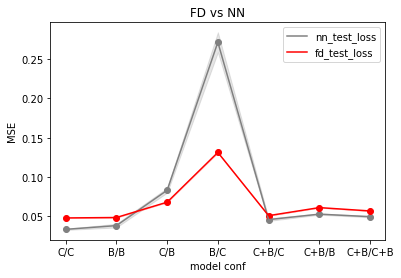

In [11]:
nn_mean = [nn_total_losses[i][0] for i in nn_total_losses.keys()]
nn_std = [nn_total_losses[i][1] for i in nn_total_losses.keys()]

fd_mean = [fd_total_losses[i][0] for i in fd_total_losses.keys()]
fd_std = [fd_total_losses[i][1] for i in fd_total_losses.keys()]



fig, ax = plt.subplots()
ax.fill_between(range(len(nn_std)), [nn_mean[i]+nn_std[i] for i in range(len(nn_std))], [nn_mean[i]-nn_std[i] for i in range(len(nn_std))], alpha=0.2, color='grey')
ax.plot(nn_mean, label='nn_test_loss', c='grey')
ax.scatter(range(len(nn_std)), nn_mean, c='grey')

ax.fill_between(range(len(fd_std)), [fd_mean[i]+fd_std[i] for i in range(len(fd_std))], [fd_mean[i]-fd_std[i] for i in range(len(fd_std))], alpha=0.2, color='red')
ax.plot(fd_mean, label='fd_test_loss', c='red')
ax.scatter(range(len(fd_mean)), fd_mean, c='red')


plt.legend()
ax.set_ylabel('MSE')
ax.set_xlabel('model conf')
ax.set_xticks(range(len(nn_mean)), labels=['C/C', 'B/B', 'C/B', 'B/C', 'C+B/C', 'C+B/B', 'C+B/C+B'])
plt.title('FD vs NN')
plt.show()

In [12]:
nn_total_losses, fd_total_losses

({'corridor_85-corridor_85': (0.03347724356079464, 0.0007264538369280551),
  'bottleneck_070-bottleneck_070': (0.03822438055982991,
   0.0023440647276230793),
  'corridor_85-bottleneck_070': (0.0831780342790015, 0.0030049275917260025),
  'bottleneck_070-corridor_85': (0.27160851713170947, 0.012702324053089428),
  'corridor_85+bottleneck_070-corridor_85': (0.045861994945941675,
   0.0016610780177319284),
  'corridor_85+bottleneck_070-bottleneck_070': (0.05282731758986502,
   0.0007793565273381629),
  'corridor_85+bottleneck_070-corridor_85+bottleneck_070': (0.0495967936524694,
   0.0008256238527038897)},
 {'corridor_85-corridor_85': (0.04799484223860324, 0),
  'bottleneck_070-bottleneck_070': (0.04853578845196586, 0),
  'corridor_85-bottleneck_070': (0.06804210079003263, 0),
  'bottleneck_070-corridor_85': (0.13135595333900896, 0),
  'corridor_85+bottleneck_070-corridor_85': (0.0509107628443507, 0),
  'corridor_85+bottleneck_070-bottleneck_070': (0.061147610832970274, 0),
  'corridor_85